# **TERMS USED IN CODE**

date = calendar date extracted from Timestamp

sentiment = market regime (Fear or Greed, derived from classification)

daily_metrics= dataset after preprocessing

merge_daily_metrics = merge dataset with sentiment

is_win = whether a trade is profitable (Closed PnL > 0)

is_long = whether a trade is long (BUY = True, SELL = False)

daily_pnl = total profit or loss per trader per day (sum of Closed PnL)

win_rate = fraction of winning trades per trader per day

trades_count = number of trades executed by a trader in a day

avg_trade_size = average USD size of trades per trader per day

long_ratio = proportion of long trades per trader per day

pnl_volatility = standard deviation of daily_pnl per trader (leverage proxy)

leverage_segment = High or Low leverage trader based on median pnl_volatility

frequency_segment = Frequent or Infrequent trader based on median trades_per_day

consistency_segment = Consistent or Inconsistent trader based on pnl_volatility

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
sentiment = pd.read_csv('fear_greed_index.csv')
trade = pd.read_csv("historical_data.csv")

In [256]:
import warnings
warnings.filterwarnings('ignore')

In [257]:
sentiment

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [258]:
trade

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158618,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,19.1100,338.88,6476.00,BUY,14-12-2024 05:59,25287.915850,Buy,0.0,0x828239d7cbe77fea2aaa04192be20b0201ec006afcdd...,5.529859e+10,False,0.016944,4.740000e+14,1.730000e+12
158619,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,19.8170,39.00,772.86,BUY,14-12-2024 07:30,25626.778900,Buy,0.0,0x6a28aba46f2e8ce69b3b04192d35c0016b00fb4f17ee...,5.531747e+10,True,0.011700,3.600000e+14,1.730000e+12
158620,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,19.8180,10.00,198.18,BUY,14-12-2024 07:30,25665.767200,Buy,0.0,0x6a28aba46f2e8ce69b3b04192d35c0016b00fb4f17ee...,5.531747e+10,True,0.003000,1.270000e+14,1.730000e+12
158621,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,19.8200,562.62,11151.13,BUY,14-12-2024 07:30,25675.764200,Buy,0.0,0x6a28aba46f2e8ce69b3b04192d35c0016b00fb4f17ee...,5.531747e+10,True,0.168786,5.230000e+14,1.730000e+12


In [259]:
print('Null_values',sentiment.isnull().sum(),
       'Shape:',sentiment.shape,
      "\nDuplicate:",sentiment.duplicated().sum())

Null_values timestamp         0
value             0
classification    0
date              0
dtype: int64 Shape: (2644, 4) 
Duplicate: 0


In [260]:
print('Null_values',trade.isnull().sum(),
       'Shape:',trade.shape,
      "\nDuplicate:",trade.duplicated().sum())

Null_values Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      1
Direction           1
Closed PnL          1
Transaction Hash    1
Order ID            1
Crossed             1
Fee                 1
Trade ID            1
Timestamp           1
dtype: int64 Shape: (158623, 16) 
Duplicate: 0


In [261]:
print(trade['Closed PnL'].mean,
      trade['Direction'].mode,
      trade['Crossed'].mode,
      trade['Fee'].mean,
      trade['Transaction Hash'].mean)

<bound method Series.mean of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
158618    0.0
158619    0.0
158620    0.0
158621    0.0
158622    NaN
Name: Closed PnL, Length: 158623, dtype: float64> <bound method Series.mode of 0         Buy
1         Buy
2         Buy
3         Buy
4         Buy
         ... 
158618    Buy
158619    Buy
158620    Buy
158621    Buy
158622    NaN
Name: Direction, Length: 158623, dtype: object> <bound method Series.mode of 0          True
1          True
2          True
3          True
4          True
          ...  
158618    False
158619     True
158620     True
158621     True
158622      NaN
Name: Crossed, Length: 158623, dtype: object> <bound method Series.mean of 0         0.345404
1         0.005600
2         0.050431
3         0.050043
4         0.003055
            ...   
158618    0.016944
158619    0.011700
158620    0.003000
158621    0.168786
158622         NaN
Name: Fee, Length: 158623, dtype: float64> <bou

In [262]:
# Drop trades with missing critical fields
trade = trade.dropna(subset=["Closed PnL", "Timestamp", "Side"])


In [263]:
trade.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [264]:
trade["Timestamp"] = pd.to_datetime(trade["Timestamp"], unit="ms")
trade["date"] = trade["Timestamp"].dt.date

In [265]:
# Convert timestamps & align dates
sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date
sentiment = sentiment[["date", "classification"]]

In [266]:
sentiment

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear
...,...,...
2639,2025-04-28,Neutral
2640,2025-04-29,Greed
2641,2025-04-30,Greed
2642,2025-05-01,Neutral


In [267]:
sentiment["sentiment"] = sentiment["classification"].apply(lambda x: "Fear" if "Fear" in x else "Greed")

sentiment = sentiment[["date", "sentiment"]]

In [268]:
trade["is_win"] = trade["Closed PnL"] > 0
trade["is_long"] = trade["Side"].str.upper() == "BUY"

In [269]:
# daily trader check
daily_metrics = trade.groupby(["date", "Account"]).agg(daily_pnl=("Closed PnL", "sum"),
    trade_count=("Closed PnL", "count"),
    win_rate=("is_win", "mean"),
    avg_trade_size=("Size USD", "mean"),
    long_ratio=("is_long", "mean")
).reset_index()

In [270]:
daily_metrics

,date,Account,daily_pnl,trade_count,win_rate,avg_trade_size,long_ratio
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,3,0.000000,159.000000,1.000000
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,2,0.000000,23066.935000,1.000000
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,155.503357,1043,0.275168,11034.799511,0.468840
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5564.016140,27,0.333333,3048.594444,0.148148
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,88,0.000000,1136.312727,1.000000
...,...,...,...,...,...,...,...
79,2025-06-15,0x8477e447846c758f5a675856001ea72298fd9cb5,-33193.569796,3782,0.101005,843.502451,0.576415
80,2025-06-15,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,16807.352360,2120,0.313679,1056.701061,0.686321
81,2025-06-15,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,38168.354860,191,0.397906,2484.570576,0.602094
82,2025-06-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,102460.171640,323,0.176471,1989.517926,0.176471


In [271]:
# merge both dataset based on Date
merge_daily_metrics = daily_metrics.merge(sentiment,on="date",how="left")

In [272]:
merge_daily_metrics

,date,Account,daily_pnl,trade_count,win_rate,avg_trade_size,long_ratio,sentiment
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,3,0.000000,159.000000,1.000000,Greed
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,2,0.000000,23066.935000,1.000000,Greed
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,155.503357,1043,0.275168,11034.799511,0.468840,Greed
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5564.016140,27,0.333333,3048.594444,0.148148,Greed
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,88,0.000000,1136.312727,1.000000,Greed
...,...,...,...,...,...,...,...,...
79,2025-06-15,0x8477e447846c758f5a675856001ea72298fd9cb5,-33193.569796,3782,0.101005,843.502451,0.576415,NaN
80,2025-06-15,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,16807.352360,2120,0.313679,1056.701061,0.686321,NaN
81,2025-06-15,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,38168.354860,191,0.397906,2484.570576,0.602094,NaN
82,2025-06-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,102460.171640,323,0.176471,1989.517926,0.176471,NaN


In [273]:
merge_daily_metrics["sentiment"].isnull().sum()

np.int64(19)

In [274]:
merge_daily_metrics = merge_daily_metrics.dropna(subset=["sentiment"])

In [275]:
merge_daily_metrics.groupby("sentiment")["daily_pnl"].mean()


,daily_pnl
sentiment,
Fear,207901.725610
Greed,67710.829693


In [276]:
merge_daily_metrics[merge_daily_metrics["sentiment"].isnull()][["date"]].drop_duplicates()

,date


In [277]:
merge_daily_metrics

,date,Account,daily_pnl,trade_count,win_rate,avg_trade_size,long_ratio,sentiment
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,3,0.000000,159.000000,1.000000,Greed
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,2,0.000000,23066.935000,1.000000,Greed
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,155.503357,1043,0.275168,11034.799511,0.468840,Greed
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5564.016140,27,0.333333,3048.594444,0.148148,Greed
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,88,0.000000,1136.312727,1.000000,Greed
...,...,...,...,...,...,...,...,...
60,2025-02-19,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,8751.751449,182,0.269231,3072.957692,0.730769,Fear
61,2025-02-19,0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb,21703.816513,525,0.323810,8441.060743,0.565714,Fear
62,2025-02-19,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,553818.000465,7380,0.391057,1818.587241,0.471138,Fear
63,2025-02-19,0xb899e522b5715391ae1d4f137653e7906c5e2115,22488.500821,4838,0.438611,22504.555829,0.489458,Fear


In [278]:
merge_daily_metrics.groupby("sentiment")["win_rate"].mean()

,win_rate
sentiment,
Fear,0.415192
Greed,0.356321


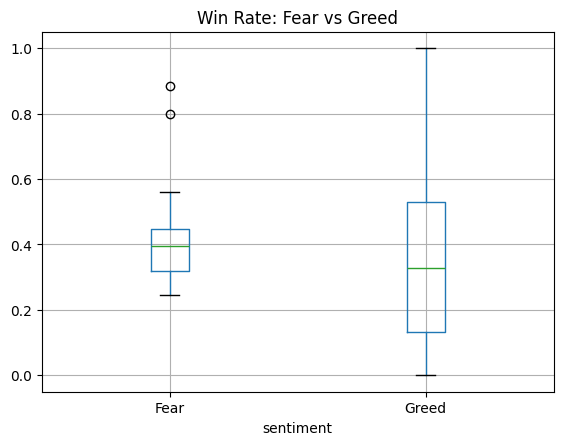

In [279]:
merge_daily_metrics.boxplot(column="win_rate", by="sentiment")
plt.title("Win Rate: Fear vs Greed")
plt.suptitle("")
plt.show()

In [280]:
print('Long_Ratio\n',merge_daily_metrics.groupby("sentiment")["long_ratio"].mean(),
'\nTrade_size\n',merge_daily_metrics.groupby("sentiment")["avg_trade_size"].mean())

Long_Ratio
 sentiment
Fear     0.458731
Greed    0.487367
Name: long_ratio, dtype: float64 
Trade_size
 sentiment
Fear     5716.401499
Greed    4359.524314
Name: avg_trade_size, dtype: float64


In [281]:
merge_daily_metrics.groupby("sentiment")["trade_count"].mean()

,trade_count
sentiment,
Fear,3732.884615
Greed,1077.128205


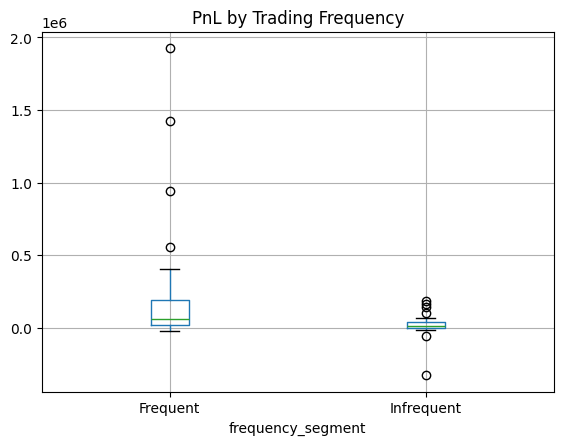

In [282]:
median_trades = daily_metrics["trade_count"].median()

merge_daily_metrics["frequency_segment"] = np.where(
    merge_daily_metrics["trade_count"] >= median_trades,
    "Frequent",
    "Infrequent")
merge_daily_metrics.boxplot(column="daily_pnl", by="frequency_segment")
plt.title("PnL by Trading Frequency")
plt.suptitle("")
plt.show()

In [283]:
pnl_volatility = merge_daily_metrics.groupby("Account")["daily_pnl"].std().reset_index()

In [284]:
pnl_volatility.columns = ["Account", "pnl_volatility"]

In [285]:
merge_daily_metrics = merge_daily_metrics.merge(pnl_volatility, on="Account")

In [286]:
median_vol = merge_daily_metrics["pnl_volatility"].median()

In [287]:
merge_daily_metrics["leverage_segment"] = np.where(merge_daily_metrics["pnl_volatility"] >= median_vol, "High Leverage",
    "Low Leverage")

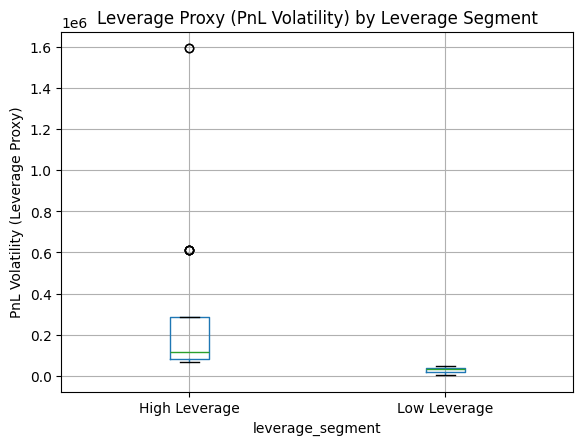

In [288]:
# leverage
merge_daily_metrics.boxplot(
    column="pnl_volatility",
    by="leverage_segment"
)

plt.title("Leverage Proxy (PnL Volatility) by Leverage Segment")
plt.suptitle("")
plt.ylabel("PnL Volatility (Leverage Proxy)")
plt.show()


*PnL volatility is higher during Fear days, especially for traders classified as high leverage. This indicates that aggressive risk-taking is penalized in risk-off regimes, increasing drawdown risk

In [289]:
merge_daily_metrics["consistency_segment"] = np.where(merge_daily_metrics["pnl_volatility"] <= median_vol,
    "Consistent",
    "Inconsistent")

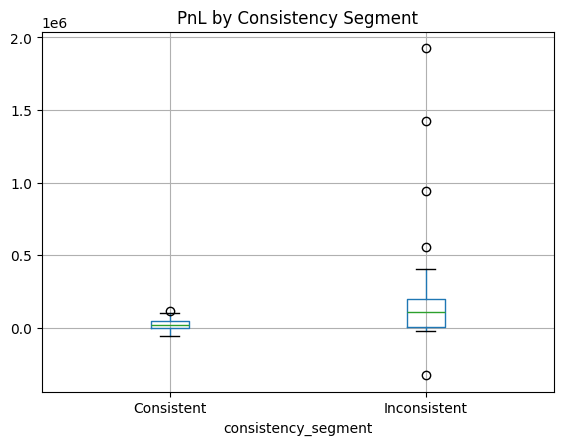

In [290]:
merge_daily_metrics.boxplot(column="daily_pnl", by="consistency_segment")
plt.title("PnL by Consistency Segment")
plt.suptitle("")
plt.show()

#A logistic regression model was trained to predict next-day trader profitability using market sentiment and same-day behavioral features. Next-day targets were used to avoid information leakage and ensure realistic predictive evaluation

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
merge_daily_metrics = daily_metrics.merge(sentiment,on="date",how="left")

In [293]:
merge_daily_metrics["profitable_day"] = (daily_metrics["daily_pnl"] > 0).astype(int)

In [295]:
merge_daily_metrics = merge_daily_metrics.dropna(subset=["sentiment"])
merge_daily_metrics[merge_daily_metrics["sentiment"].isnull()][["date"]].drop_duplicates()

,date


In [296]:
merge_daily_metrics["sentiment_encoded"] = merge_daily_metrics["sentiment"].map({"Fear": 0, "Greed": 1})

In [297]:
merge_daily_metrics = merge_daily_metrics.sort_values(["Account", "date"])

merge_daily_metrics["next_day_pnl"] = (merge_daily_metrics.groupby("Account")["daily_pnl"].shift(-1))

merge_daily_metrics["next_day_profitable"] = (merge_daily_metrics["next_day_pnl"] > 0).astype(int)

merge_daily_metrics = merge_daily_metrics.dropna(subset=["next_day_pnl"])

In [298]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [299]:
pnl_volatility = (merge_daily_metrics.groupby("Account")["daily_pnl"].std().reset_index(name="pnl_volatility"))


In [300]:
merge_daily_metrics = merge_daily_metrics.merge(pnl_volatility,on="Account",how="left")

In [301]:
merge_daily_metrics.columns

Index(['date', 'Account', 'daily_pnl', 'trade_count', 'win_rate',
       'avg_trade_size', 'long_ratio', 'sentiment', 'profitable_day',
       'sentiment_encoded', 'next_day_pnl', 'next_day_profitable',
       'pnl_volatility'],
      dtype='object')

In [302]:
merge_daily_metrics["pnl_volatility"] = (merge_daily_metrics["pnl_volatility"].fillna(0))

In [303]:
features = ["sentiment_encoded","trade_count","avg_trade_size","long_ratio","win_rate","pnl_volatility"]


In [304]:
X = merge_daily_metrics[features]
y = merge_daily_metrics["next_day_profitable"]

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [306]:
model.fit(X_train, y_train)

LogisticRegression()

In [307]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9


In [308]:
coef_df = pd.DataFrame({"feature": features, "coefficient": model.coef_[0]}).sort_values(by="coefficient", ascending=False)

coef_df

,feature,coefficient
0,sentiment_encoded,0.363367
4,win_rate,0.270762
1,trade_count,0.002389
5,pnl_volatility,0.000001
2,avg_trade_size,-0.000108
3,long_ratio,-0.448049
